## Keratinocyte-0h test set, bpnet architecture


In [141]:
import pandas as pd 
from scipy.stats import spearmanr 
from scipy.stats import pearsonr 
from scipy.special import softmax

# 100 bp 

### get ranked list of IDR peaks on chrom 1 (test chrom)

In [142]:
idr_peaks=pd.read_csv("test.set.0.keratinocyte-0h.100bp.bed",header=None,sep='\t')

In [143]:
idr_peaks['summit']=idr_peaks[1]+idr_peaks[9]

In [144]:
idr_peaks.shape

(18734, 11)

In [145]:
idr_peaks=idr_peaks.sort_values(by=[8],ascending=False)

In [146]:
idr_peaks.head()

0          1          2  \
2      chr1     629696     629896   
6      chr1     633935     634135   
4      chr1     631019     631219   
18422  chr1  244452029  244452229   
18437  chr1  244652803  244653003   

                                                       3      4  5         6  \
2         keratinocytes-0h.merged.sorted.MACS2-PE_peak_3  84983  .   7.19626   
6         keratinocytes-0h.merged.sorted.MACS2-PE_peak_7  67003  .   6.19992   
4         keratinocytes-0h.merged.sorted.MACS2-PE_peak_5  21578  .   3.56756   
18422  keratinocytes-0h.merged.sorted.MACS2-PE_peak_1...  20115  .  17.78251   
18437  keratinocytes-0h.merged.sorted.MACS2-PE_peak_1...  19186  .  15.93248   

                7           8     9     summit  
2      8505.31641  8498.39551   498     630194  
6      6706.78271  6700.30322   135     634070  
4      2163.56226  2157.83032    84     631103  
18422  2017.27283  2011.59131  1015  244453044  
18437  1924.32361  1918.67419   429  244653232

In [147]:
positions=[]
top_peaks=20
count=0
for index,row in idr_peaks.iterrows(): 
    summit=int(row[1]+0.5*(row[2]-row[1]))
    chrom=row[0]
    count+=1
    if count >top_peaks: 
        break
    positions.append((chrom,summit))
        

In [148]:
len(positions)

20

In [149]:
positions

[('chr1', 629796),
 ('chr1', 634035),
 ('chr1', 631119),
 ('chr1', 244452129),
 ('chr1', 244652903),
 ('chr1', 170074678),
 ('chr1', 159780861),
 ('chr1', 70411104),
 ('chr1', 81175055),
 ('chr1', 218496793),
 ('chr1', 171781419),
 ('chr1', 184755038),
 ('chr1', 58848979),
 ('chr1', 88992904),
 ('chr1', 110964060),
 ('chr1', 100249882),
 ('chr1', 47314238),
 ('chr1', 630392),
 ('chr1', 55429329),
 ('chr1', 193059513)]

In [150]:
## for plotting 
import matplotlib 
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"]=10,5

In [151]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

In [152]:
dup_hw_profile_labels_0=pd.read_hdf("predictions.keratinocytes-0h.100bp_peak.0.labels.0",header=None,sep='\t')
dup_hw_profile_labels_1=pd.read_hdf("predictions.keratinocytes-0h.100bp_peak.0.labels.1",header=None,sep='\t')
dup_hw_profile_pred_0=pd.read_hdf("predictions.keratinocytes-0h.100bp_peak.0.predictions.0",header=None,sep='\t')
dup_hw_profile_pred_1=pd.read_hdf("predictions.keratinocytes-0h.100bp_peak.0.predictions.1",header=None,sep='\t')

In [153]:
#get counts profile & softmax 
dup_hw_profile_pred_0_softmax=softmax(dup_hw_profile_pred_0,axis=1)

In [154]:
dup_hw_profile_pred_0_softmax.shape

(18734, 1000)

In [155]:
for i in range(1,1000): 
    dup_hw_profile_pred_1[i]=dup_hw_profile_pred_1[0]

In [156]:
dup_hw_profile_pred_0_count=dup_hw_profile_pred_0_softmax.multiply(dup_hw_profile_pred_1,axis='index')

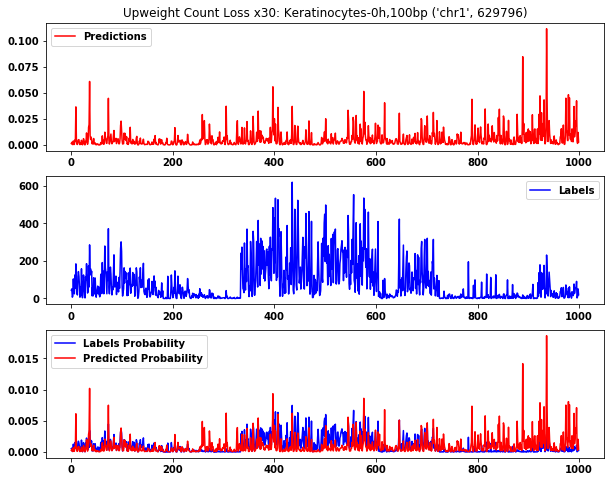

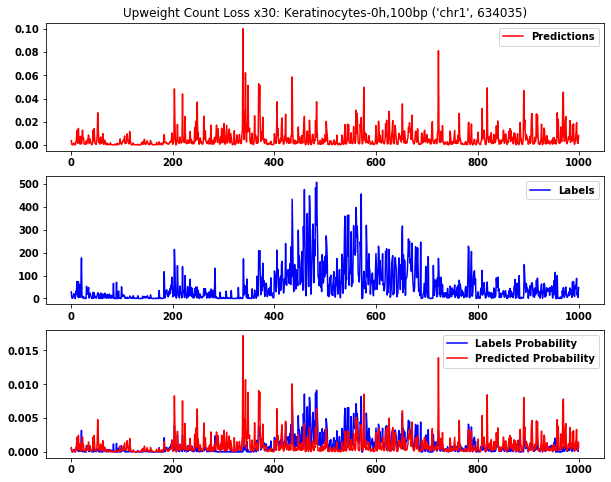

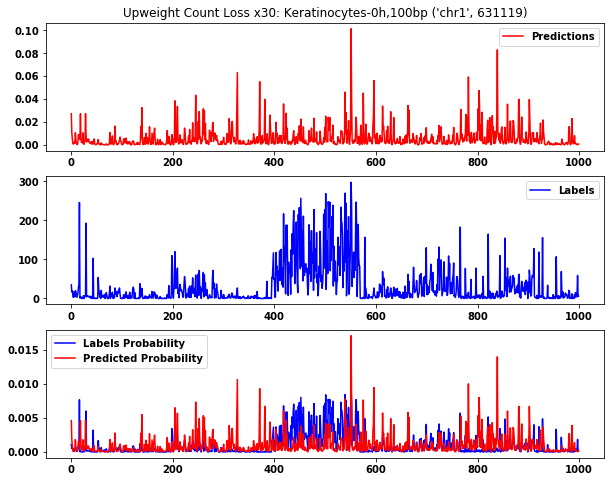

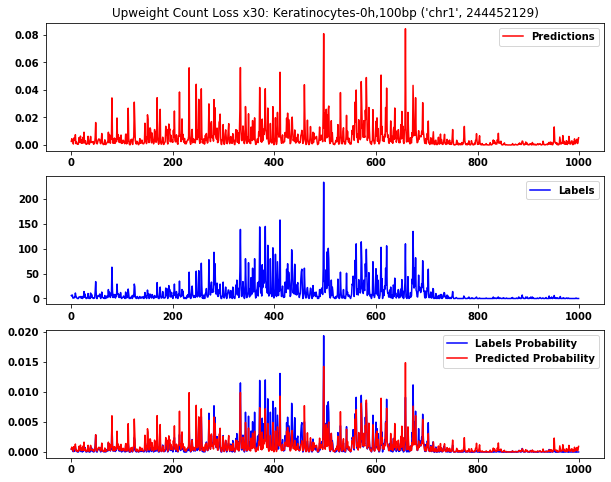

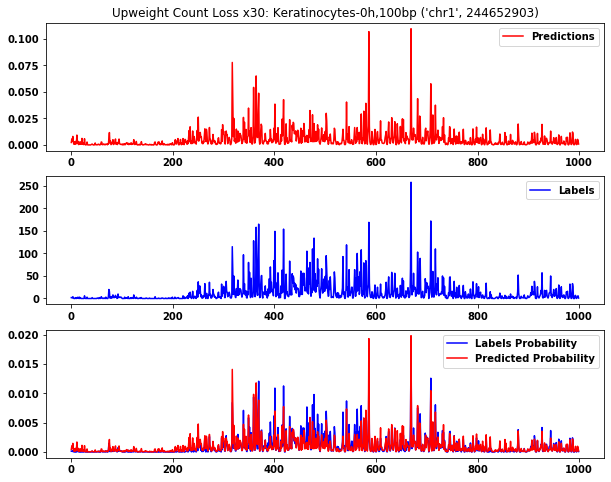

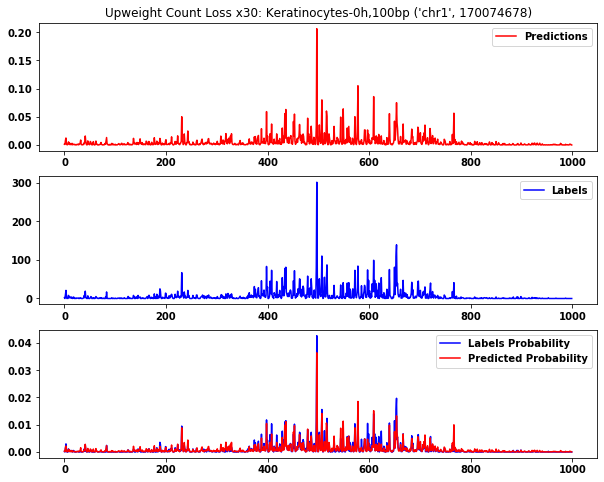

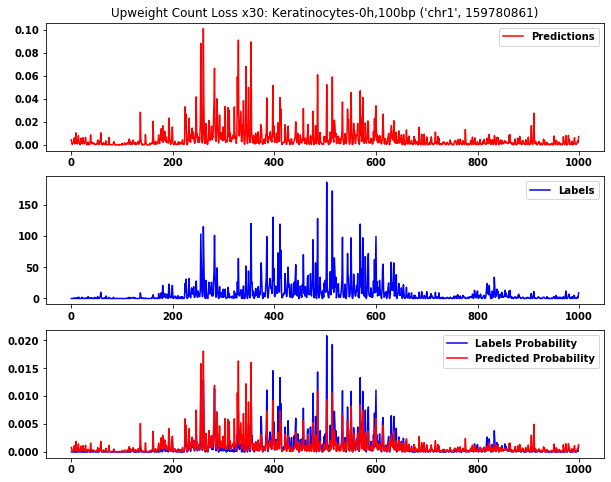

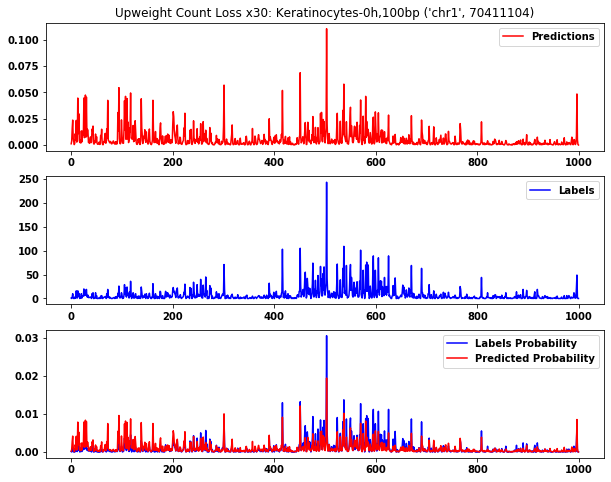

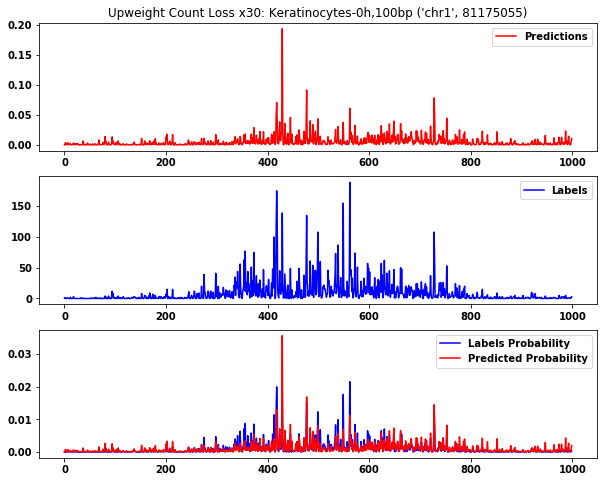

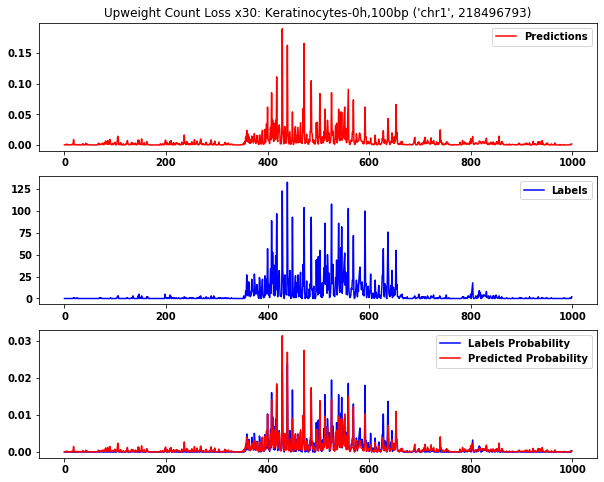

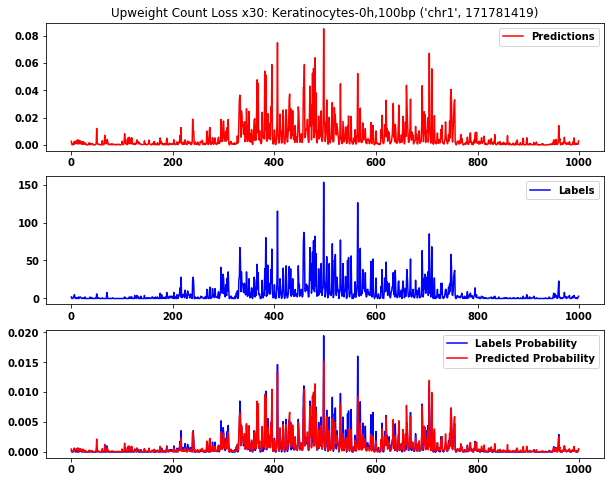

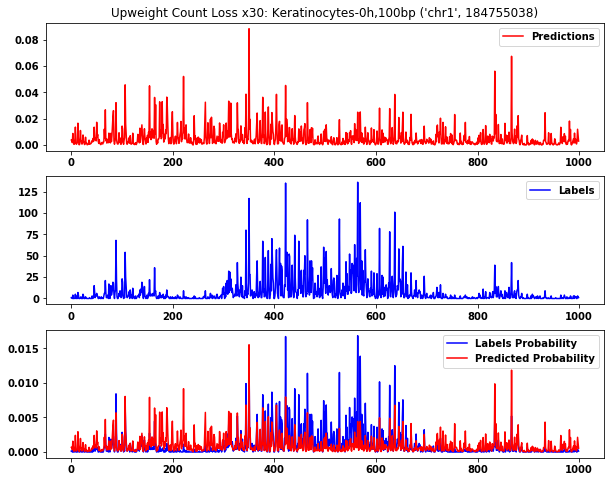

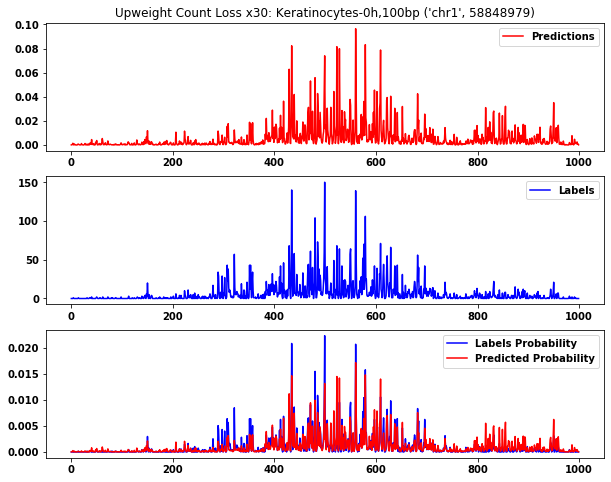

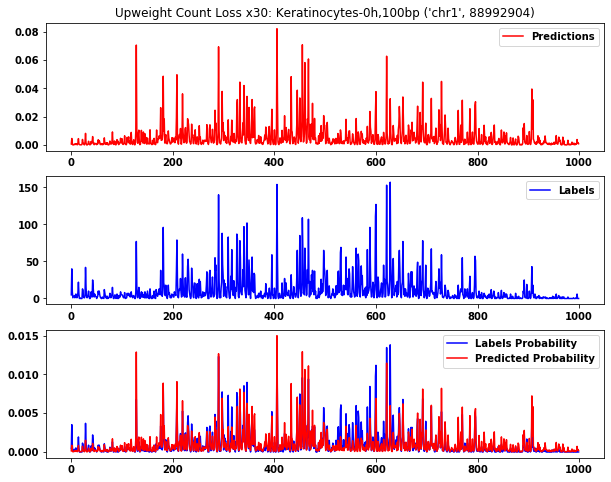

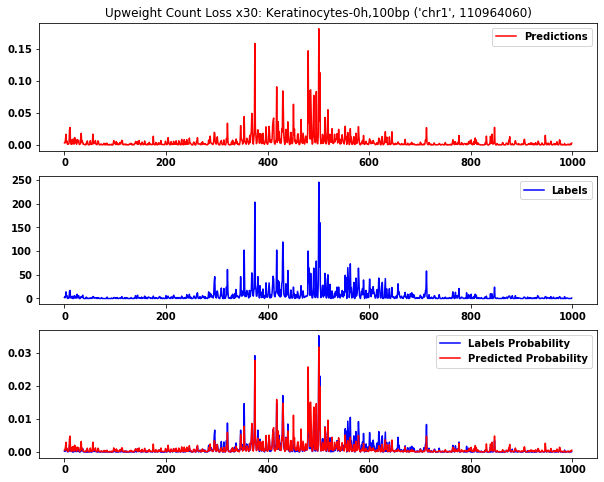

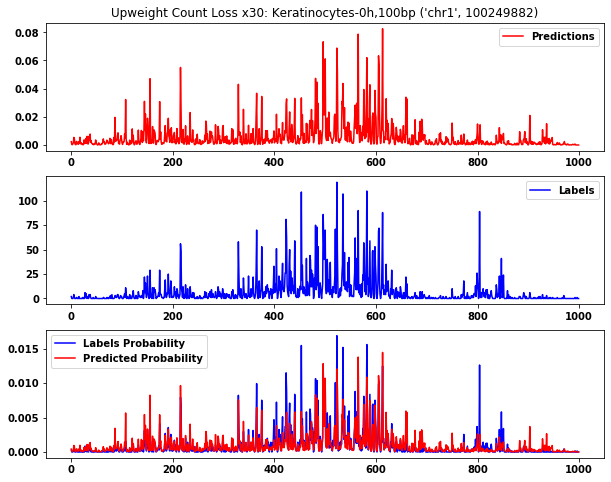

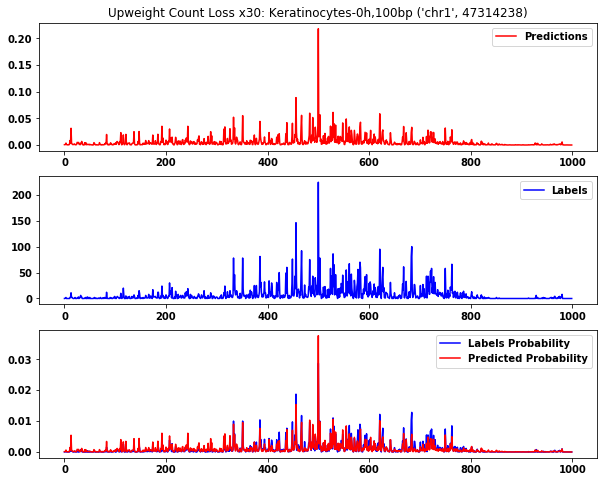

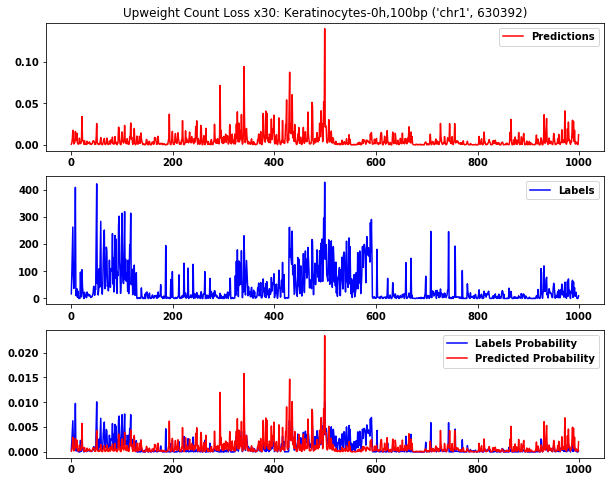

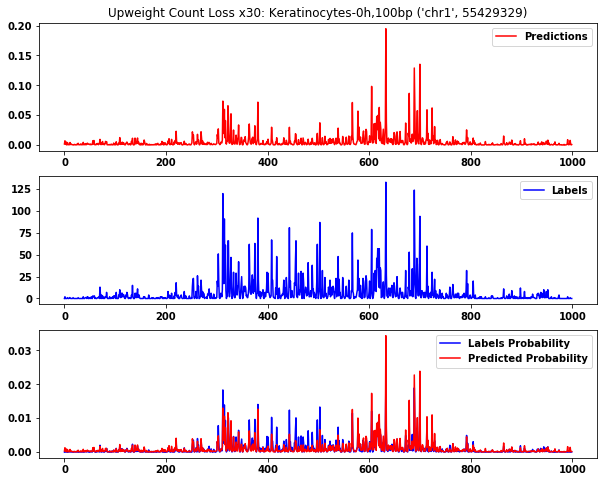

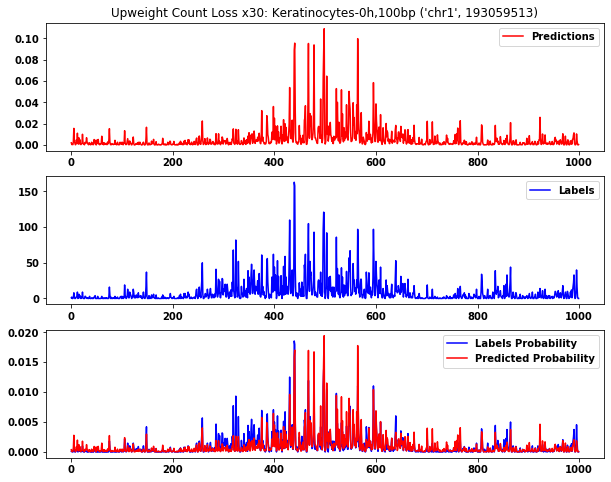

In [157]:
plt.rcParams["figure.figsize"]=10,8
for pos in positions[0:20]:
    fig, axes = plt.subplots(3, 1)
    probs_observed=dup_hw_profile_labels_0.loc[pos].values/sum(dup_hw_profile_labels_0.loc[pos].values)
    axes[0].plot(dup_hw_profile_pred_0_count.loc[pos],label='Predictions',color='r')
    axes[1].plot(dup_hw_profile_labels_0.loc[pos],label='Labels',color='b')
    axes[2].plot(probs_observed,label="Labels Probability",color='b')
    axes[2].plot(dup_hw_profile_pred_0_softmax.loc[pos],label="Predicted Probability",color='r')    
    axes[0].set_title('Upweight Count Loss x30: Keratinocytes-0h,100bp '+str(pos))
    axes[0].legend()
    axes[1].legend() 
    axes[2].legend()

No handles with labels found to put in legend.


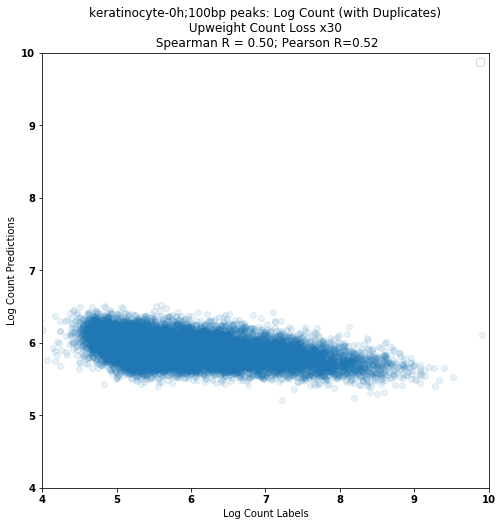

In [158]:
plt.rcParams["figure.figsize"]=8,8
plt.figure()
plt.scatter(dup_hw_profile_labels_1[0].values, dup_hw_profile_pred_1[0].values ,alpha=0.1)
plt.xlim(4,10)
plt.ylim(4,10)
plt.xlabel('Log Count Labels')
plt.ylabel('Log Count Predictions')
plt.title('keratinocyte-0h;100bp peaks: Log Count (with Duplicates)\n Upweight Count Loss x30 \n Spearman R = 0.50; Pearson R=0.52')
plt.legend(loc='best')
plt.show()

In [159]:
spearmanr(dup_hw_profile_labels_1[0].values,dup_hw_profile_pred_1[0].values)

SpearmanrResult(correlation=-0.4151891546295025, pvalue=0.0)

In [160]:
pearsonr(dup_hw_profile_labels_1[0].values,dup_hw_profile_pred_1[0].values)

(-0.4206388738414052, 0.0)

## high weight counts loss 

In [161]:
dup_hw_count_labels_0=pd.read_hdf("predictions.keratinocytes-0h.200bp_peak.0.labels.0",header=None,sep='\t')
dup_hw_count_labels_1=pd.read_hdf("predictions.keratinocytes-0h.200bp_peak.0.labels.1",header=None,sep='\t')
dup_hw_count_pred_0=pd.read_hdf("predictions.keratinocytes-0h.200bp_peak.0.predictions.0",header=None,sep='\t')
dup_hw_count_pred_1=pd.read_hdf("predictions.keratinocytes-0h.200bp_peak.0.predictions.1",header=None,sep='\t')

In [162]:
dup_hw_count_pred_0_softmax=softmax(dup_hw_count_pred_0,axis=1)

In [163]:
for i in range(1,1000): 
    dup_hw_count_pred_1[i]=dup_hw_count_pred_1[0]

In [164]:
dup_hw_count_pred_0_count=dup_hw_count_pred_0_softmax.multiply(dup_hw_count_pred_1,axis='index')

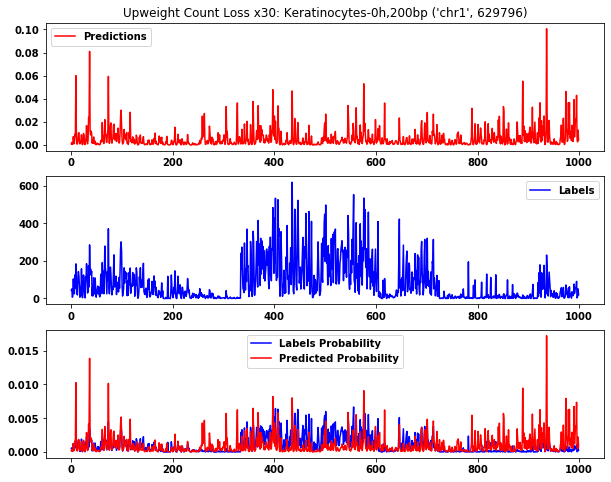

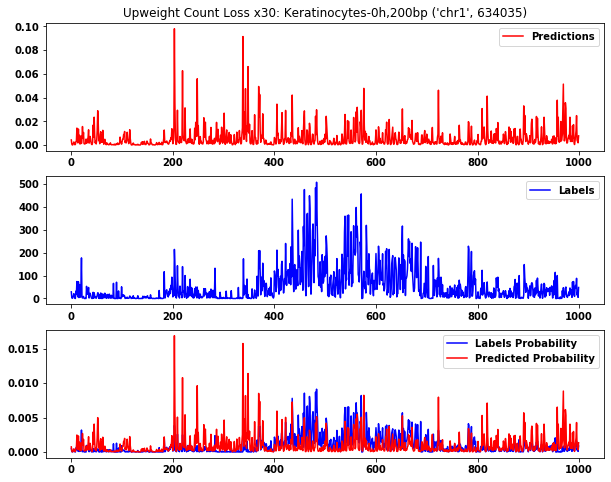

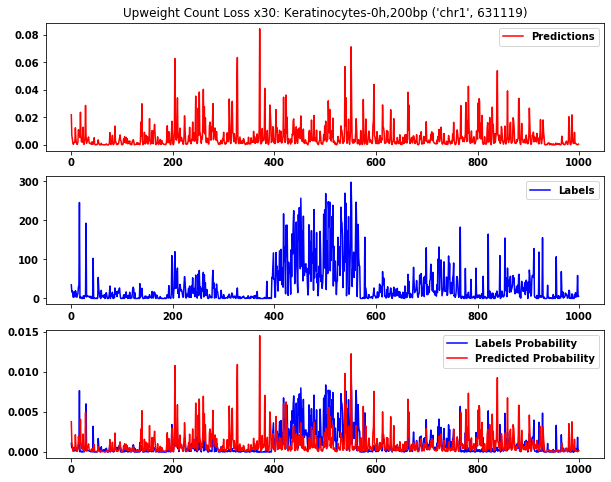

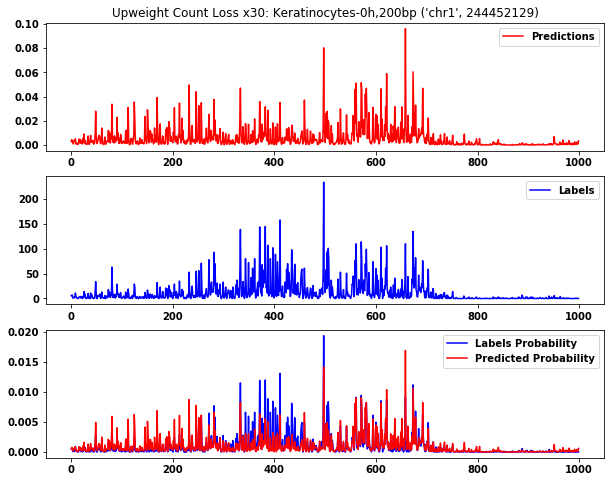

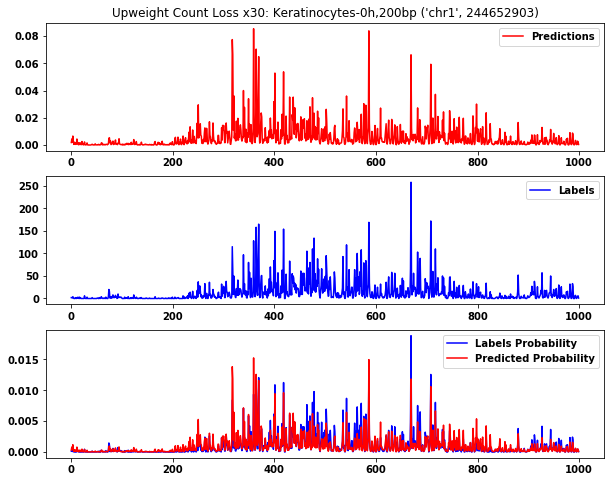

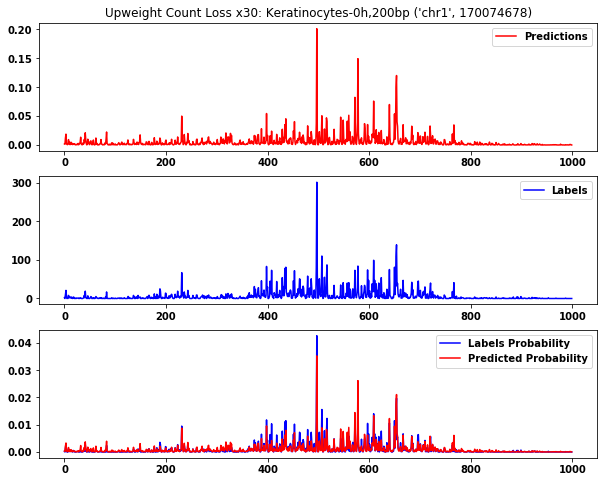

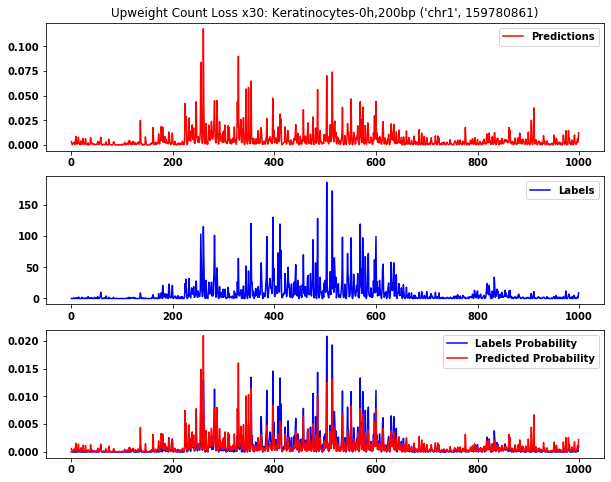

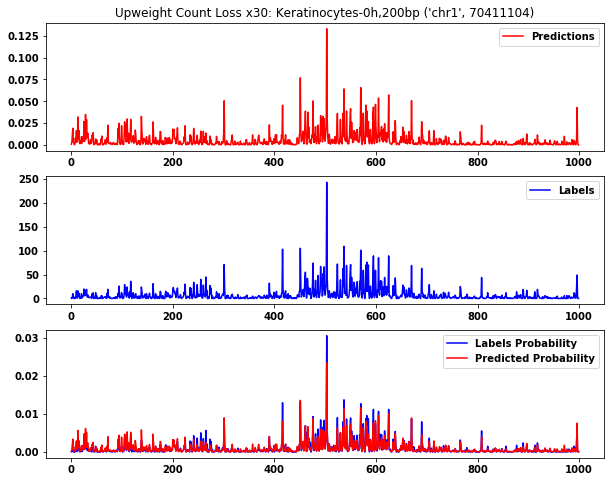

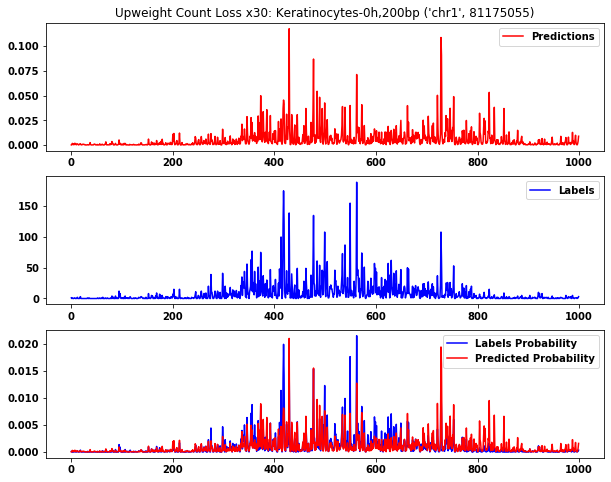

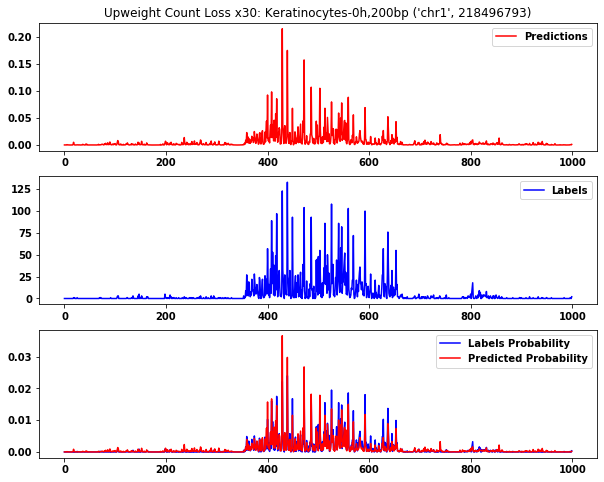

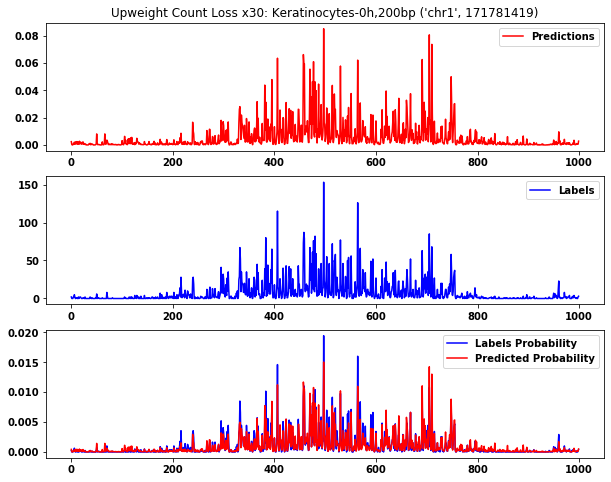

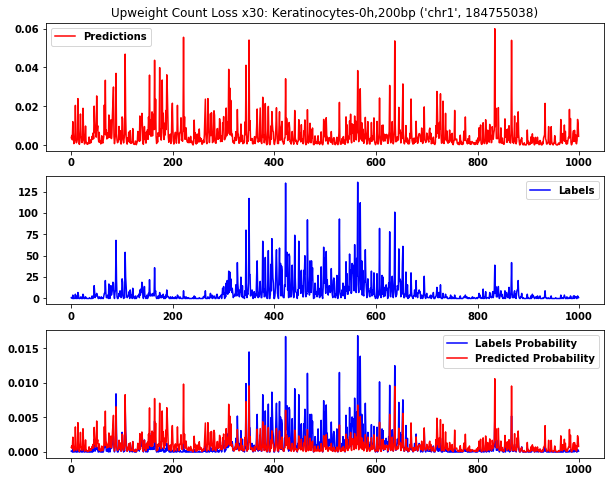

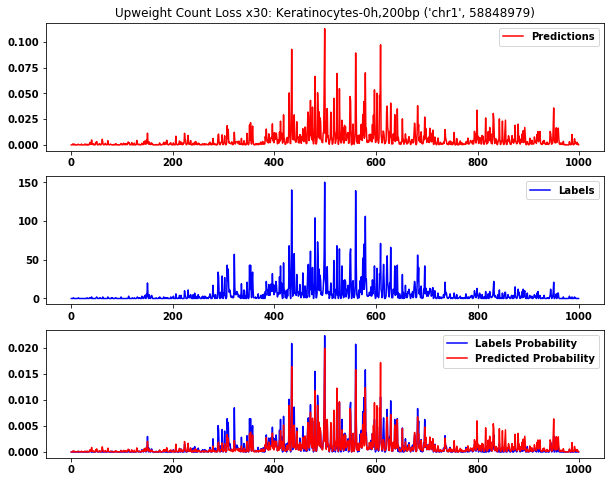

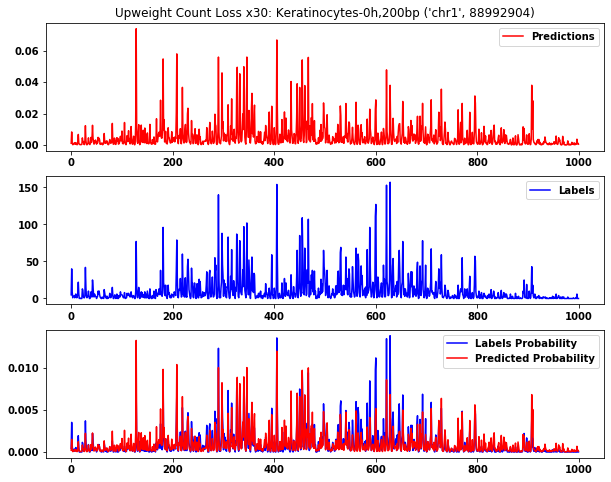

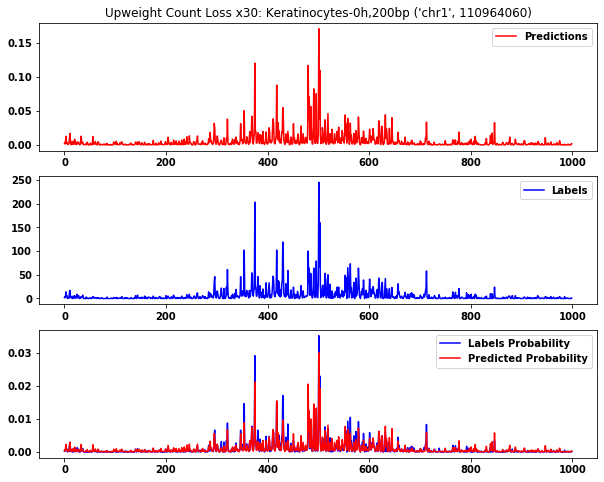

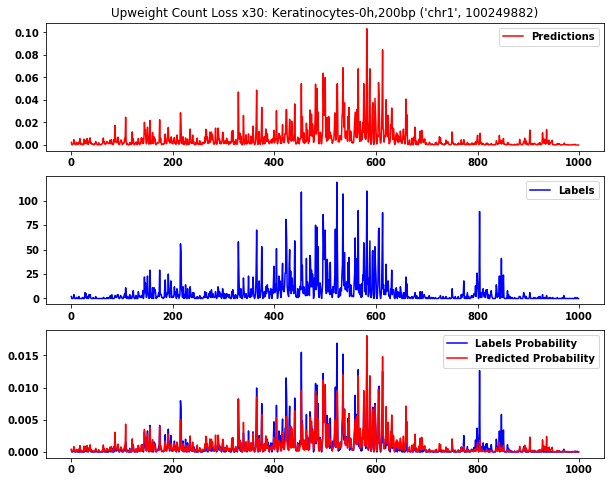

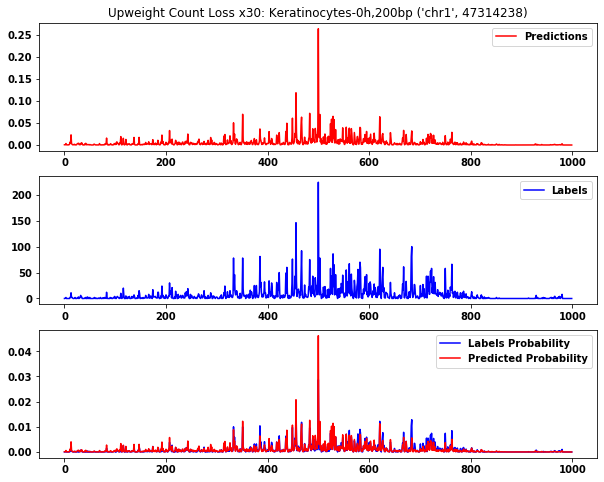

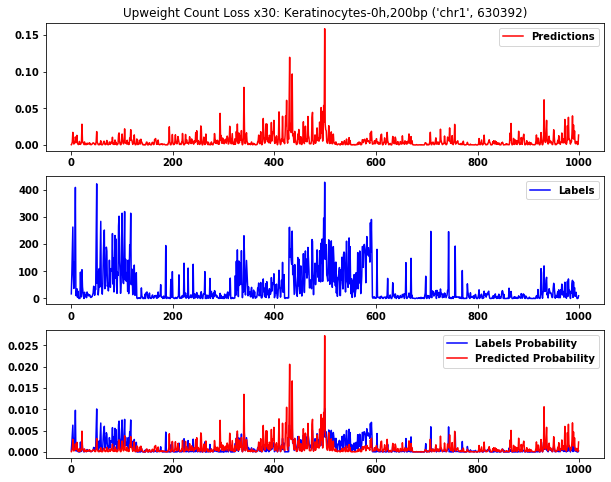

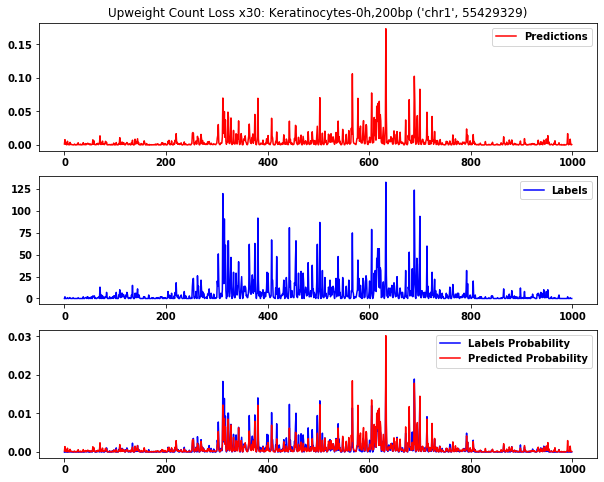

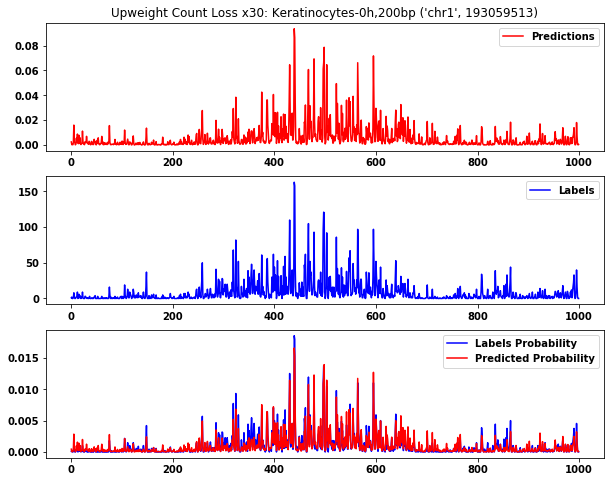

In [165]:
plt.rcParams["figure.figsize"]=10,8

for pos in positions[0:20]:
    fig, axes = plt.subplots(3, 1)
    probs_observed=dup_hw_count_labels_0.loc[pos].values/sum(dup_hw_count_labels_0.loc[pos].values)
    axes[0].plot(dup_hw_count_pred_0_count.loc[pos],label='Predictions',color='r')
    axes[1].plot(dup_hw_count_labels_0.loc[pos],label='Labels',color='b')
    axes[2].plot(probs_observed,label="Labels Probability",color='b')
    axes[2].plot(dup_hw_count_pred_0_softmax.loc[pos],label="Predicted Probability",color='r')    
    axes[0].set_title('Upweight Count Loss x30: Keratinocytes-0h,200bp '+str(pos))
    axes[0].legend()
    axes[1].legend() 
    axes[2].legend()

No handles with labels found to put in legend.


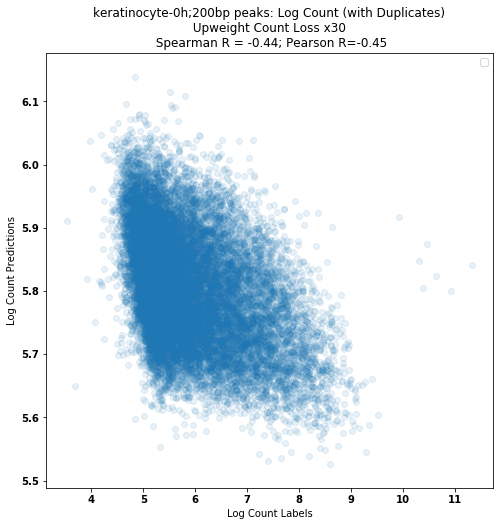

In [166]:
plt.rcParams["figure.figsize"]=8,8
plt.figure()
plt.scatter(dup_hw_count_labels_1[0].values, dup_hw_count_pred_1[0].values ,alpha=0.1)
plt.xlabel('Log Count Labels')
plt.ylabel('Log Count Predictions')
plt.title('keratinocyte-0h;200bp peaks: Log Count (with Duplicates)\n Upweight Count Loss x30 \n Spearman R = -0.44; Pearson R=-0.45')
plt.legend(loc='best')
plt.show()

In [75]:
spearmanr(dup_hw_count_labels_1[0].values,dup_hw_count_pred_1[0].values)

SpearmanrResult(correlation=-0.43694150164507284, pvalue=0.0)

In [76]:
pearsonr(dup_hw_count_labels_1[0].values,dup_hw_count_pred_1[0].values)

(-0.4467203027665547, 0.0)

## With dups, no upweighting 

In [167]:
withdup_labels_0=pd.read_hdf("predictions.keratinocytes-0h.500bp_peak.0.labels.0",header=None,sep='\t')
withdup_labels_1=pd.read_hdf("predictions.keratinocytes-0h.500bp_peak.0.labels.1",header=None,sep='\t')
withdup_pred_0=pd.read_hdf("predictions.keratinocytes-0h.500bp_peak.0.predictions.0",header=None,sep='\t')
withdup_pred_1=pd.read_hdf("predictions.keratinocytes-0h.500bp_peak.0.predictions.1",header=None,sep='\t')

In [168]:
withdup_pred_0_softmax=softmax(withdup_pred_0,axis=1)

In [169]:
for i in range(1,1000): 
    withdup_pred_1[i]=withdup_pred_1[0]

In [170]:
withdup_pred_0_count=withdup_pred_0_softmax.multiply(withdup_pred_1,axis='index')

In [171]:
withdup_labels_0

0     1      2      3      4     5      6      7      8    \
CHR  CENTER                                                                  
chr1 56380       0.0   0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0   
     629144      0.0   0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0   
     629796     44.0  51.0    7.0   13.0  104.0  30.0   25.0  125.0   54.0   
     630392     17.0  87.0  180.0  263.0   87.0  37.0  132.0  138.0  409.0   
     631119     35.0  17.0   19.0   12.0    3.0  17.0    9.0    4.0   20.0   
...              ...   ...    ...    ...    ...   ...    ...    ...    ...   
     248891078   0.0   1.0    1.0    0.0    0.0   0.0    0.0    0.0    0.0   
     248892846   0.0   1.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0   
     248897580   0.0   0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0   
     248906485   0.0   1.0    0.0    0.0    5.0   0.0    4.0    0.0    0.0   
     248918273   0.0   0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0   

                  9    ...   990   991   992    993    994   995    996   997  \
CHR  CENTER            ...                                                      
chr1 56380        0.0  ...   0.0   0.0   0.0    0.0    0.0   0.0    0.0   0.0   
     629144       0.0  ...  53.0  48.0  31.0  295.0  115.0  45.0  159.0  90.0   
     629796     184.0  ...  77.0  27.0  48.0   58.0   54.0  91.0    3.0  10.0   
     630392      11.0  ...  17.0  40.0   8.0   14.0   23.0   6.0    0.0   0.0   
     631119      18.0  ...   0.0  10.0   3.0   15.0    7.0   4.0   11.0  59.0   
...               ...  ...   ...   ...   ...    ...    ...   ...    ...   ...   
     248891078    0.0  ...   0.0   0.0   0.0    0.0    0.0   0.0    0.0   0.0   
     248892846    0.0  ...   0.0   1.0   0.0    0.0    0.0   0.0    0.0   0.0   
     248897580    0.0  ...   0.0   0.0   0.0    0.0    0.0   0.0    0.0   0.0   
     248906485    2.0  ...   1.0   0.0   0.0    1.0    0.0   1.0    0.0   1.0   
     248918273    0.0  ...   0.0   0.0   0.0    0.0    0.0   0.0    0.0   0.0   

                  998    999  
CHR  CENTER                   
chr1 56380        0.0    0.0  
     629144     369.0  164.0  
     629796      51.0   20.0  
     630392       1.0   10.0  
     631119       5.0    6.0  
...               ...    ...  
     248891078    0.0    0.0  
     248892846    0.0    0.0  
     248897580    0.0    0.0  
     248906485    0.0    0.0  
     248918273    0.0    0.0  

[18734 rows x 1000 columns]

In [172]:
withdup_labels_0.loc[pos]

0       1.0
1       2.0
2       0.0
3       0.0
4       1.0
       ... 
995    40.0
996    16.0
997     2.0
998     0.0
999     0.0
Name: (chr1, 193059513), Length: 1000, dtype: float64

In [173]:
positions[0]

('chr1', 629796)

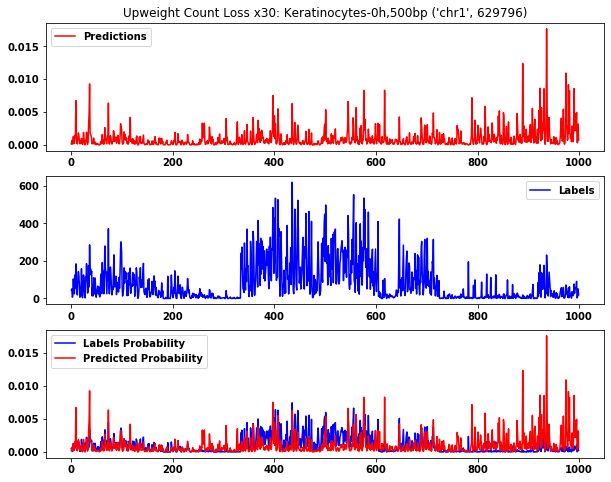

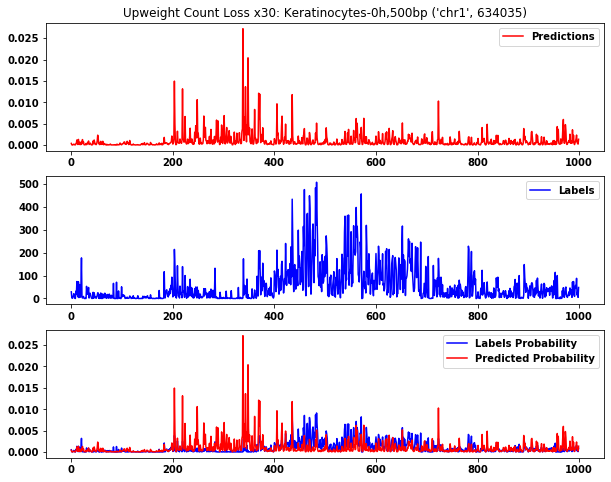

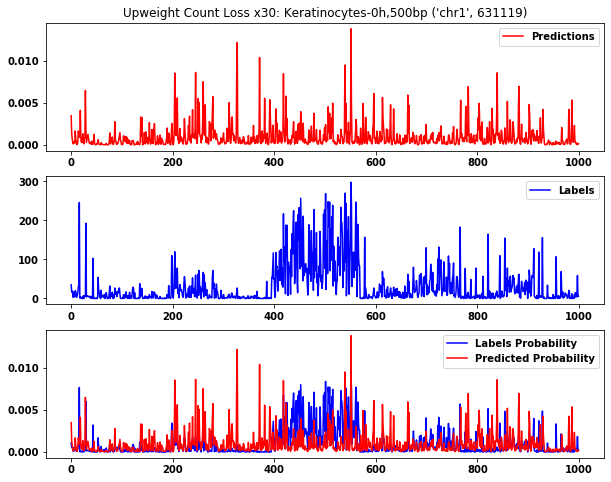

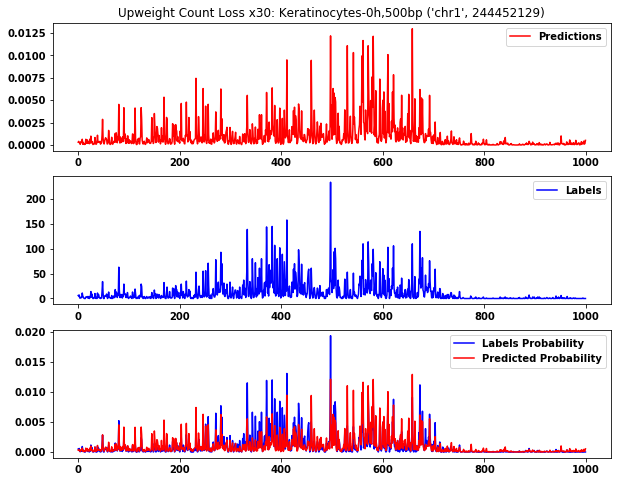

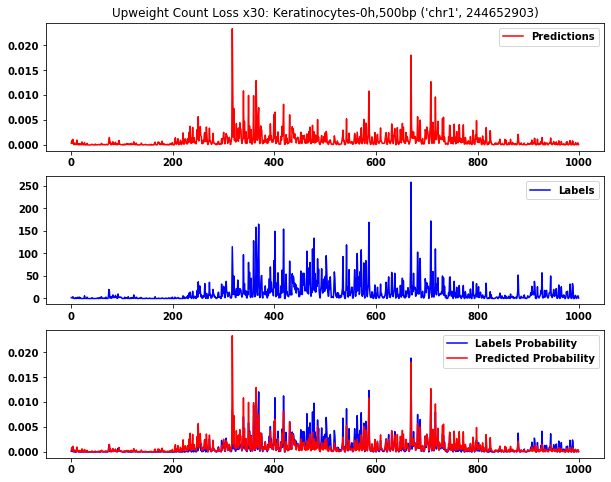

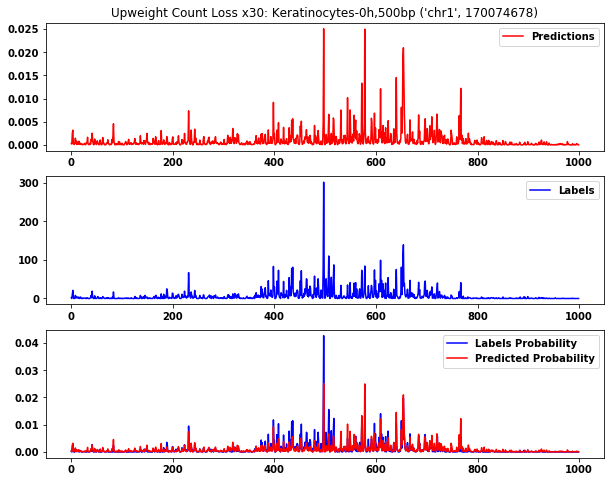

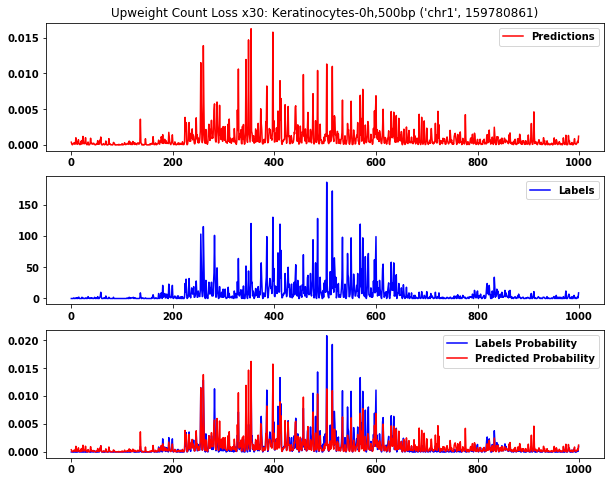

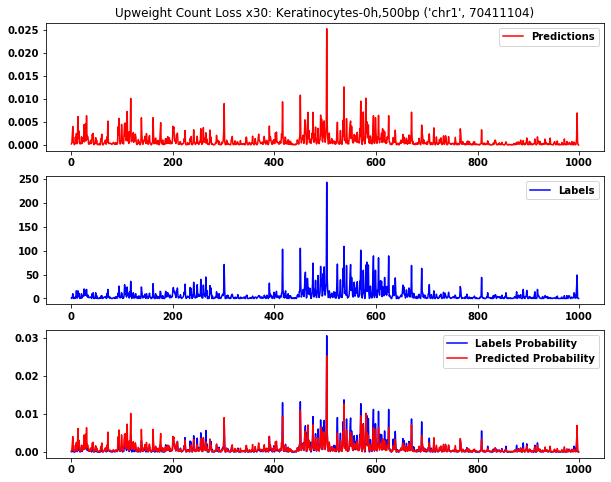

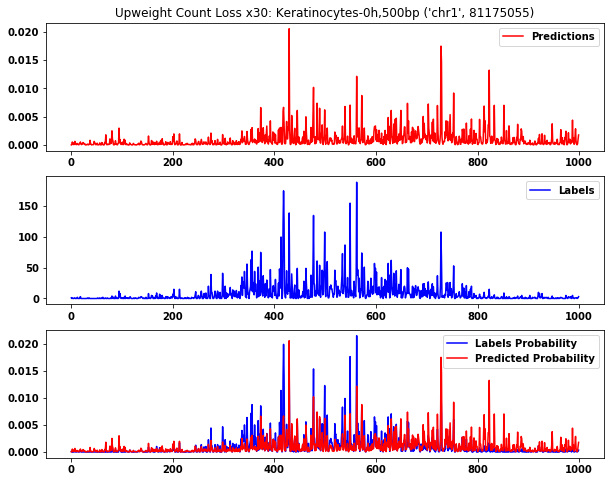

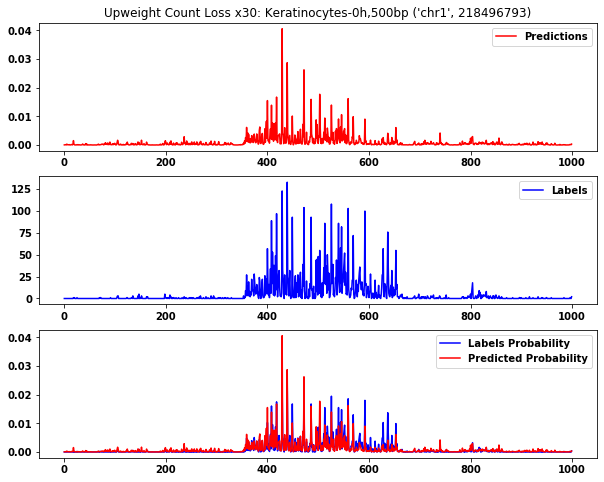

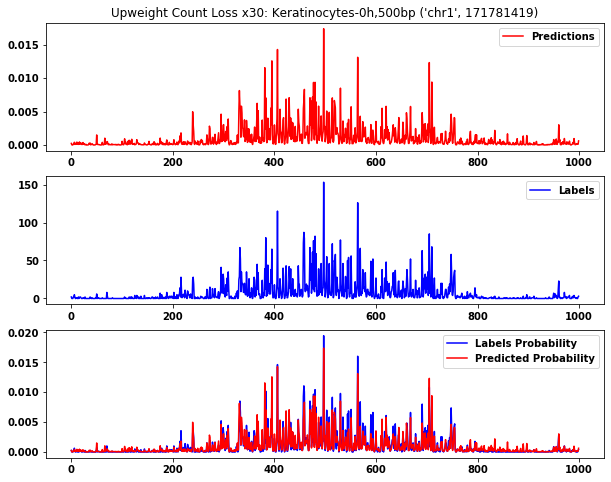

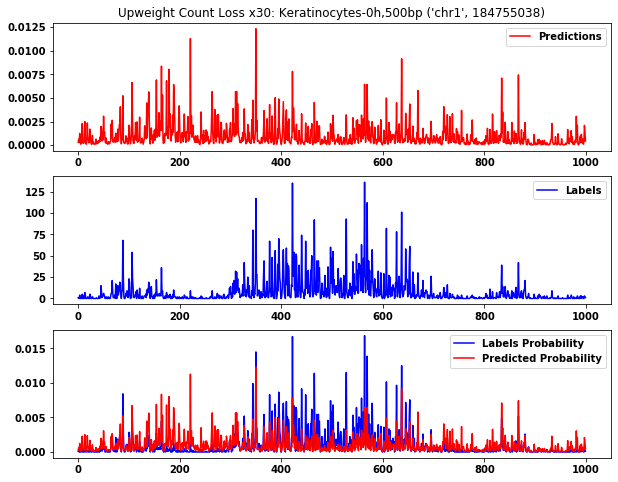

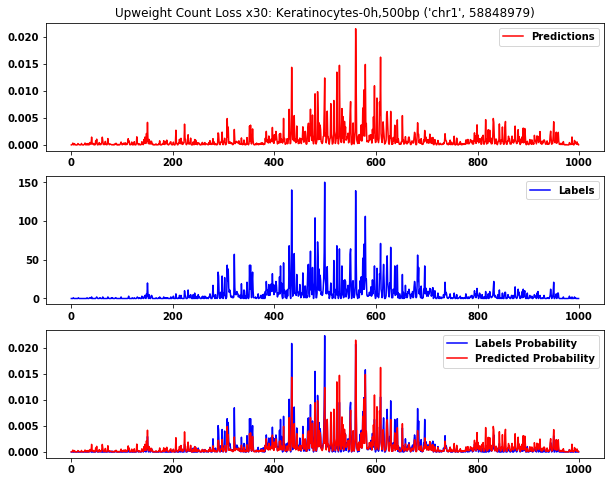

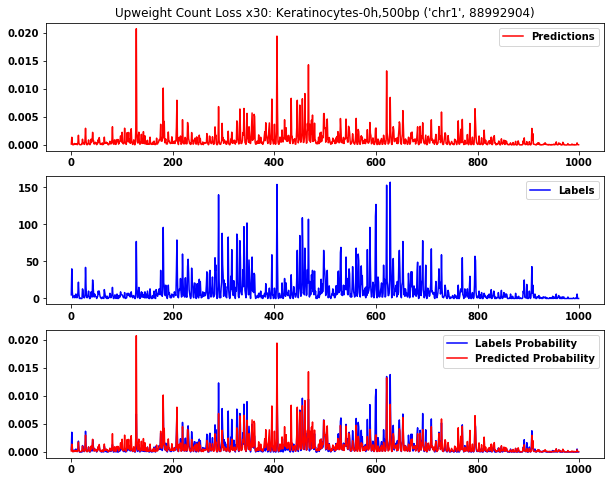

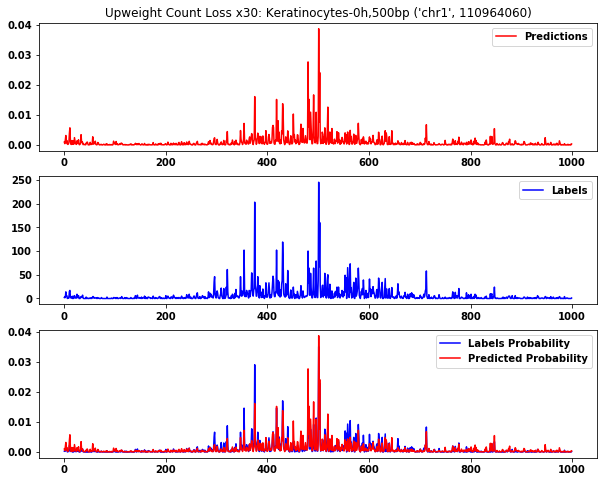

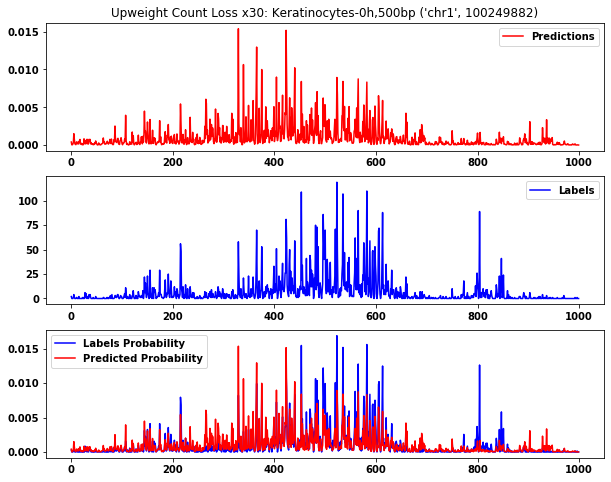

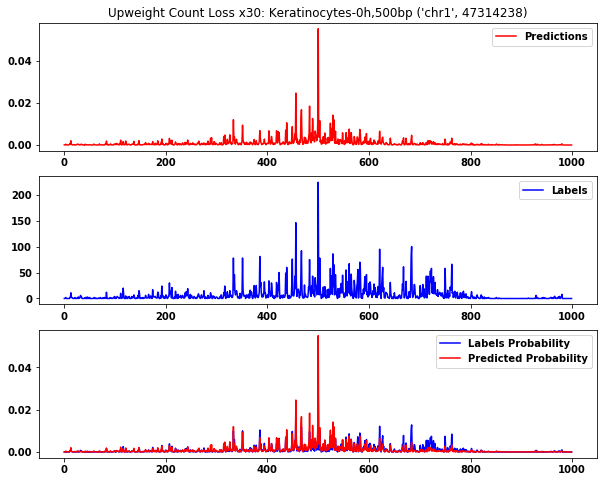

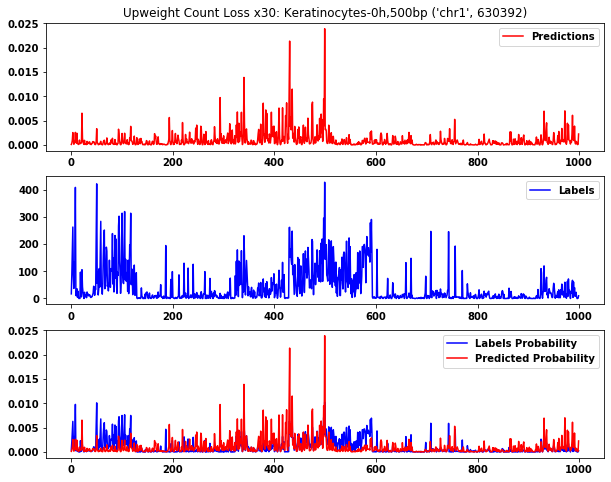

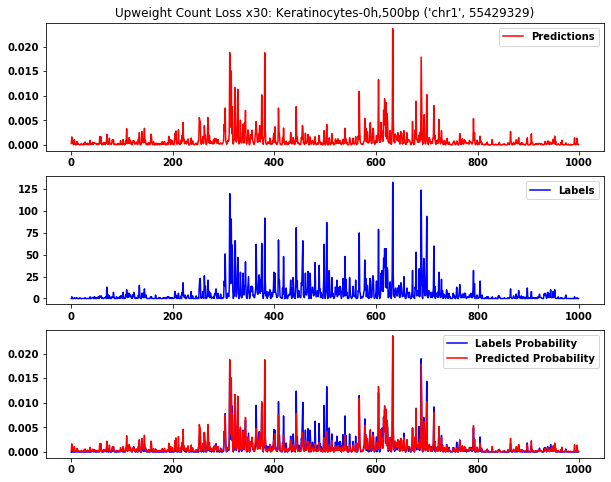

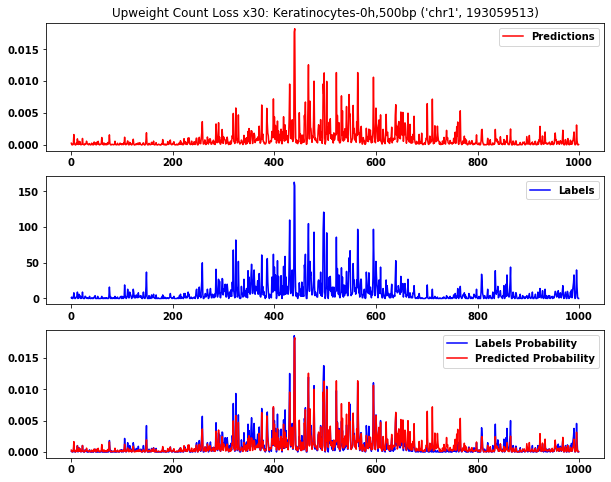

In [174]:
plt.rcParams["figure.figsize"]=10,8

for pos in positions[0:20]:
    fig, axes = plt.subplots(3, 1)
    probs_observed=withdup_labels_0.loc[pos].values/sum(withdup_labels_0.loc[pos].values)
    axes[0].plot(withdup_pred_0_softmax.loc[pos],label='Predictions',color='r')
    axes[1].plot(withdup_labels_0.loc[pos],label='Labels',color='b')
    axes[2].plot(probs_observed,label="Labels Probability",color='b')
    axes[2].plot(withdup_pred_0_softmax.loc[pos],label="Predicted Probability",color='r')    
    axes[0].set_title('Upweight Count Loss x30: Keratinocytes-0h,500bp '+str(pos))
    axes[0].legend()
    axes[1].legend() 
    axes[2].legend()

No handles with labels found to put in legend.


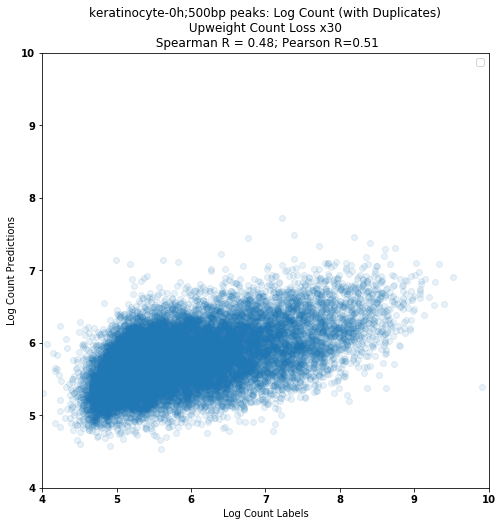

In [177]:
plt.rcParams["figure.figsize"]=8,8
plt.figure()
plt.xlim(4,10)
plt.ylim(4,10)
plt.scatter(withdup_labels_1[0].values, withdup_pred_1[0].values ,alpha=0.1)
plt.xlabel('Log Count Labels')
plt.ylabel('Log Count Predictions')
plt.title('keratinocyte-0h;500bp peaks: Log Count (with Duplicates)\n Upweight Count Loss x30 \n Spearman R = 0.48; Pearson R=0.51')
plt.legend(loc='best')
plt.show()

In [91]:
spearmanr(withdup_labels_1[0].values,withdup_pred_1[0].values)

SpearmanrResult(correlation=0.478453743836033, pvalue=0.0)

In [92]:
pearsonr(withdup_labels_1[0].values,withdup_pred_1[0].values)

(0.5065971499034131, 0.0)